In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from cdlib import algorithms, evaluation, viz, ensemble
from cdlib.classes import NodeClustering

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'graph_tool', 'infomap', 'leidenalg'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg'}


In [3]:
# Importing data

DG = nx.read_gexf('../data_collection/data/network_connected.gexf')

# Community Discovery

In [4]:
# Evaluation

def eval_cd(graph,comms): # comms = communites resulting from cd algorithm
    print('Overlapping: ', comms.overlap)
    print('Node coverage: ', comms.node_coverage)
    print()
    # Internal evaluation
    print('Internal edge density: ', evaluation.internal_edge_density(graph,comms))
    print('Average node degree: ', evaluation.average_internal_degree(graph,comms))
    print('Modularity: ', evaluation.erdos_renyi_modularity(graph,comms))
    print('Conductance: ', evaluation.conductance(graph,comms))
    print()
    # Printing sizes
    print('Number of communities: ', len(comms.communities))
    print('Largest community size: ', len(comms.communities[0]))
    print('Second largest community: ', len(comms.communities[1]))
    print('Third community: ', len(comms.communities[2]))


## Directed graph

### Infomap

In [5]:
info = algorithms.infomap(DG)

In [6]:
eval_cd(DG,info)

Overlapping:  False
Node coverage:  1.0

Internal edge density:  FitnessResult(min=0.0, max=3.0, score=0.869742284025011, std=0.6835680062660164)
Average node degree:  FitnessResult(min=0.0, max=172.13333333333333, score=4.538544073773611, std=9.178089995400182)
Modularity:  FitnessResult(min=None, max=None, score=0.6379461059732644, std=None)
Conductance:  FitnessResult(min=0.0, max=0.9310344827586207, score=0.3413715982536888, std=0.22600187689306417)

Number of communities:  948
Largest community size:  601
Second largest community:  351
Third community:  339


### EM

In [7]:
k = ensemble.Parameter(name='k',start=1,end=20,step=2)
em, em_scoring = ensemble.grid_search(graph=DG, method=algorithms.em,
                                            parameters=[k],
                                            quality_score=evaluation.erdos_renyi_modularity,aggregate=max)

In [8]:
eval_cd(DG,em)

Overlapping:  False
Node coverage:  1.0

Internal edge density:  FitnessResult(min=0.0, max=0.045454545454545456, score=0.0071312381589367126, std=0.011931619164524924)
Average node degree:  FitnessResult(min=0.0, max=34.837321675103546, score=2.6748426888060286, std=8.602930526557849)
Modularity:  FitnessResult(min=None, max=None, score=0.42757539209227763, std=None)
Conductance:  FitnessResult(min=0.0258429605036691, max=1.0, score=0.7883378790913321, std=0.23837568390594105)

Number of communities:  15
Largest community size:  8692
Second largest community:  1807
Third community:  704


<Axes: xlabel='Algorithm', ylabel='internal_edge_density'>

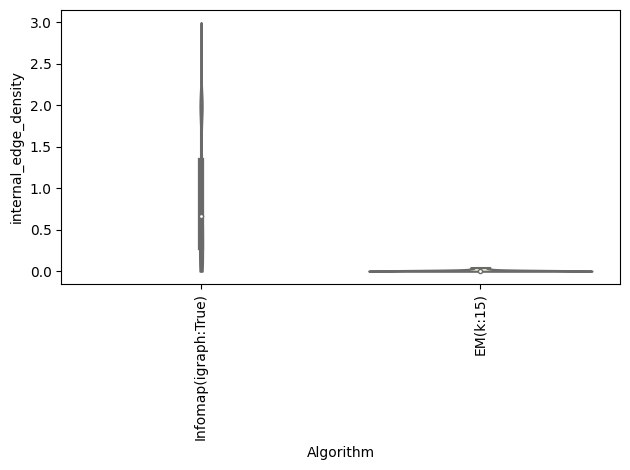

In [9]:
viz.plot_com_stat([info,em], evaluation.internal_edge_density)

## Undirected graph

In [10]:
# Converting to undirected graph 

G = nx.DiGraph.to_undirected(DG)

In [11]:
nx.is_connected(G)

True

### Louvain

In [12]:
louvain = algorithms.louvain(G)

In [13]:
eval_cd(G,louvain)

Overlapping:  False
Node coverage:  1.0

Internal edge density:  FitnessResult(min=0.0070716236609572, max=1.0, score=0.27268167653986713, std=0.3376847039614447)
Average node degree:  FitnessResult(min=1.8461538461538463, max=80.81632653061224, score=15.178026082903228, std=14.546736132994667)
Modularity:  FitnessResult(min=None, max=None, score=0.6927994885513256, std=None)
Conductance:  FitnessResult(min=0.00847457627118644, max=0.3385416666666667, score=0.16050680188077684, std=0.10217638511828694)

Number of communities:  28
Largest community size:  2214
Second largest community:  1736
Third community:  1544


### Label propagation

In [14]:
label = algorithms.label_propagation(G)

In [15]:
eval_cd(G,label)

Overlapping:  False
Node coverage:  1.0

Internal edge density:  FitnessResult(min=0, max=2.0, score=0.792887383543033, std=0.30214381986042294)
Average node degree:  FitnessResult(min=1.0, max=60.02272727272727, score=3.5477194938022443, std=6.098813536084349)
Modularity:  FitnessResult(min=None, max=None, score=0.5469590413815273, std=None)
Conductance:  FitnessResult(min=0.00847457627118644, max=0.7142857142857143, score=0.3933236460465974, std=0.15119265446862853)

Number of communities:  391
Largest community size:  6543
Second largest community:  1148
Third community:  909


### Infomap

In [16]:
infomap = algorithms.infomap(G)

In [17]:
eval_cd(G,infomap)

Overlapping:  False
Node coverage:  1.0

Internal edge density:  FitnessResult(min=0.010521281683405069, max=1.0, score=0.506467855828565, std=0.32041796931068045)
Average node degree:  FitnessResult(min=1.0, max=83.40506329113924, score=3.689859589444605, std=6.476226076791425)
Modularity:  FitnessResult(min=None, max=None, score=0.6333416617060974, std=None)
Conductance:  FitnessResult(min=0.00847457627118644, max=0.8952618453865336, score=0.5227777680686589, std=0.17976967014895134)

Number of communities:  789
Largest community size:  440
Second largest community:  401
Third community:  343


<Axes: xlabel='Algorithm', ylabel='internal_edge_density'>

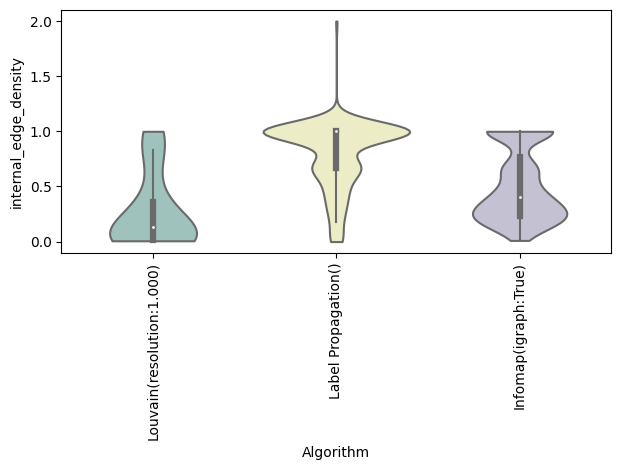

In [18]:
viz.plot_com_stat([louvain,label,infomap], evaluation.internal_edge_density)

# Comparing results

In [19]:
list_of_comms = ['Infomap (DG)','EM (DG)','Louvain (G)','Label propagation (G)','Infomap (G)']

# List of all metrics obtained
ied = [evaluation.internal_edge_density(DG,info),evaluation.internal_edge_density(DG,em),
       evaluation.internal_edge_density(G,louvain),evaluation.internal_edge_density(G,label),
       evaluation.internal_edge_density(G,infomap)]

avg_nd = [evaluation.average_internal_degree(DG,info),evaluation.average_internal_degree(DG,em),
       evaluation.average_internal_degree(G,louvain),evaluation.average_internal_degree(G,label),
       evaluation.average_internal_degree(G,infomap)]

mod = [evaluation.erdos_renyi_modularity(DG,info),evaluation.erdos_renyi_modularity(DG,em),
       evaluation.erdos_renyi_modularity(G,louvain),evaluation.erdos_renyi_modularity(G,label),
       evaluation.erdos_renyi_modularity(G,infomap)]

con = [evaluation.conductance(DG,info),evaluation.conductance(DG,em),
       evaluation.conductance(G,louvain),evaluation.conductance(G,label),
       evaluation.conductance(G,infomap)]

# Taking only the score
ied = [el[2] for el in ied]
avg_nd = [el[2] for el in avg_nd]
mod = [el[2] for el in mod]
con = [el[2] for el in con]

In [20]:
ied

[0.869742284025011,
 0.0071312381589367126,
 0.27268167653986713,
 0.792887383543033,
 0.506467855828565]

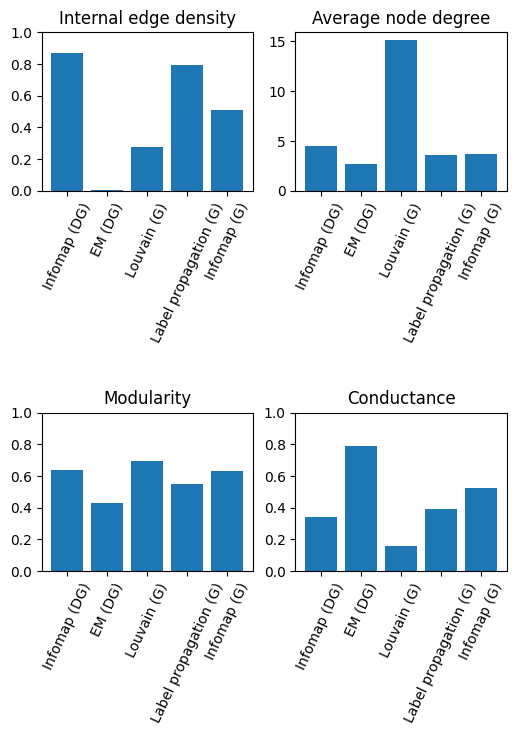

In [46]:
fig = plt.figure(figsize=(6,7))
fig.tight_layout()

plt.subplot(3,2,1)
plt.title('Internal edge density')
plt.bar(list_of_comms,ied)
plt.ylim([0,1])
plt.xticks(rotation=65)

plt.subplot(3,2,2)
plt.title('Average node degree')
plt.bar(list_of_comms,avg_nd)
plt.xticks(rotation=65)

plt.subplot(3,2,5)
plt.title('Modularity')
plt.bar(list_of_comms,mod)
plt.ylim([0,1])
plt.xticks(rotation=65)

plt.subplot(3,2,6)
plt.title('Conductance')
plt.bar(list_of_comms,con)
plt.ylim([0,1])
plt.xticks(rotation=65)

plt.show()

In [22]:
print('Comparison with Louvain - Normalized mutal information (NMI):')

print('\nInfomap (DG): ',louvain.normalized_mutual_information(info))
print('EM (DG): ',louvain.normalized_mutual_information(em))
print('Label propagation (G): ',louvain.normalized_mutual_information(label))
print('Infomap (G): ',louvain.normalized_mutual_information(infomap))

Comparison with Louvain - Normalized mutal information (NMI):

Infomap (DG):  MatchingResult(score=0.5035569567177709, std=None)
EM (DG):  MatchingResult(score=0.05992623132785868, std=None)
Label propagation (G):  MatchingResult(score=0.5188284604770197, std=None)
Infomap (G):  MatchingResult(score=0.5363833892239066, std=None)


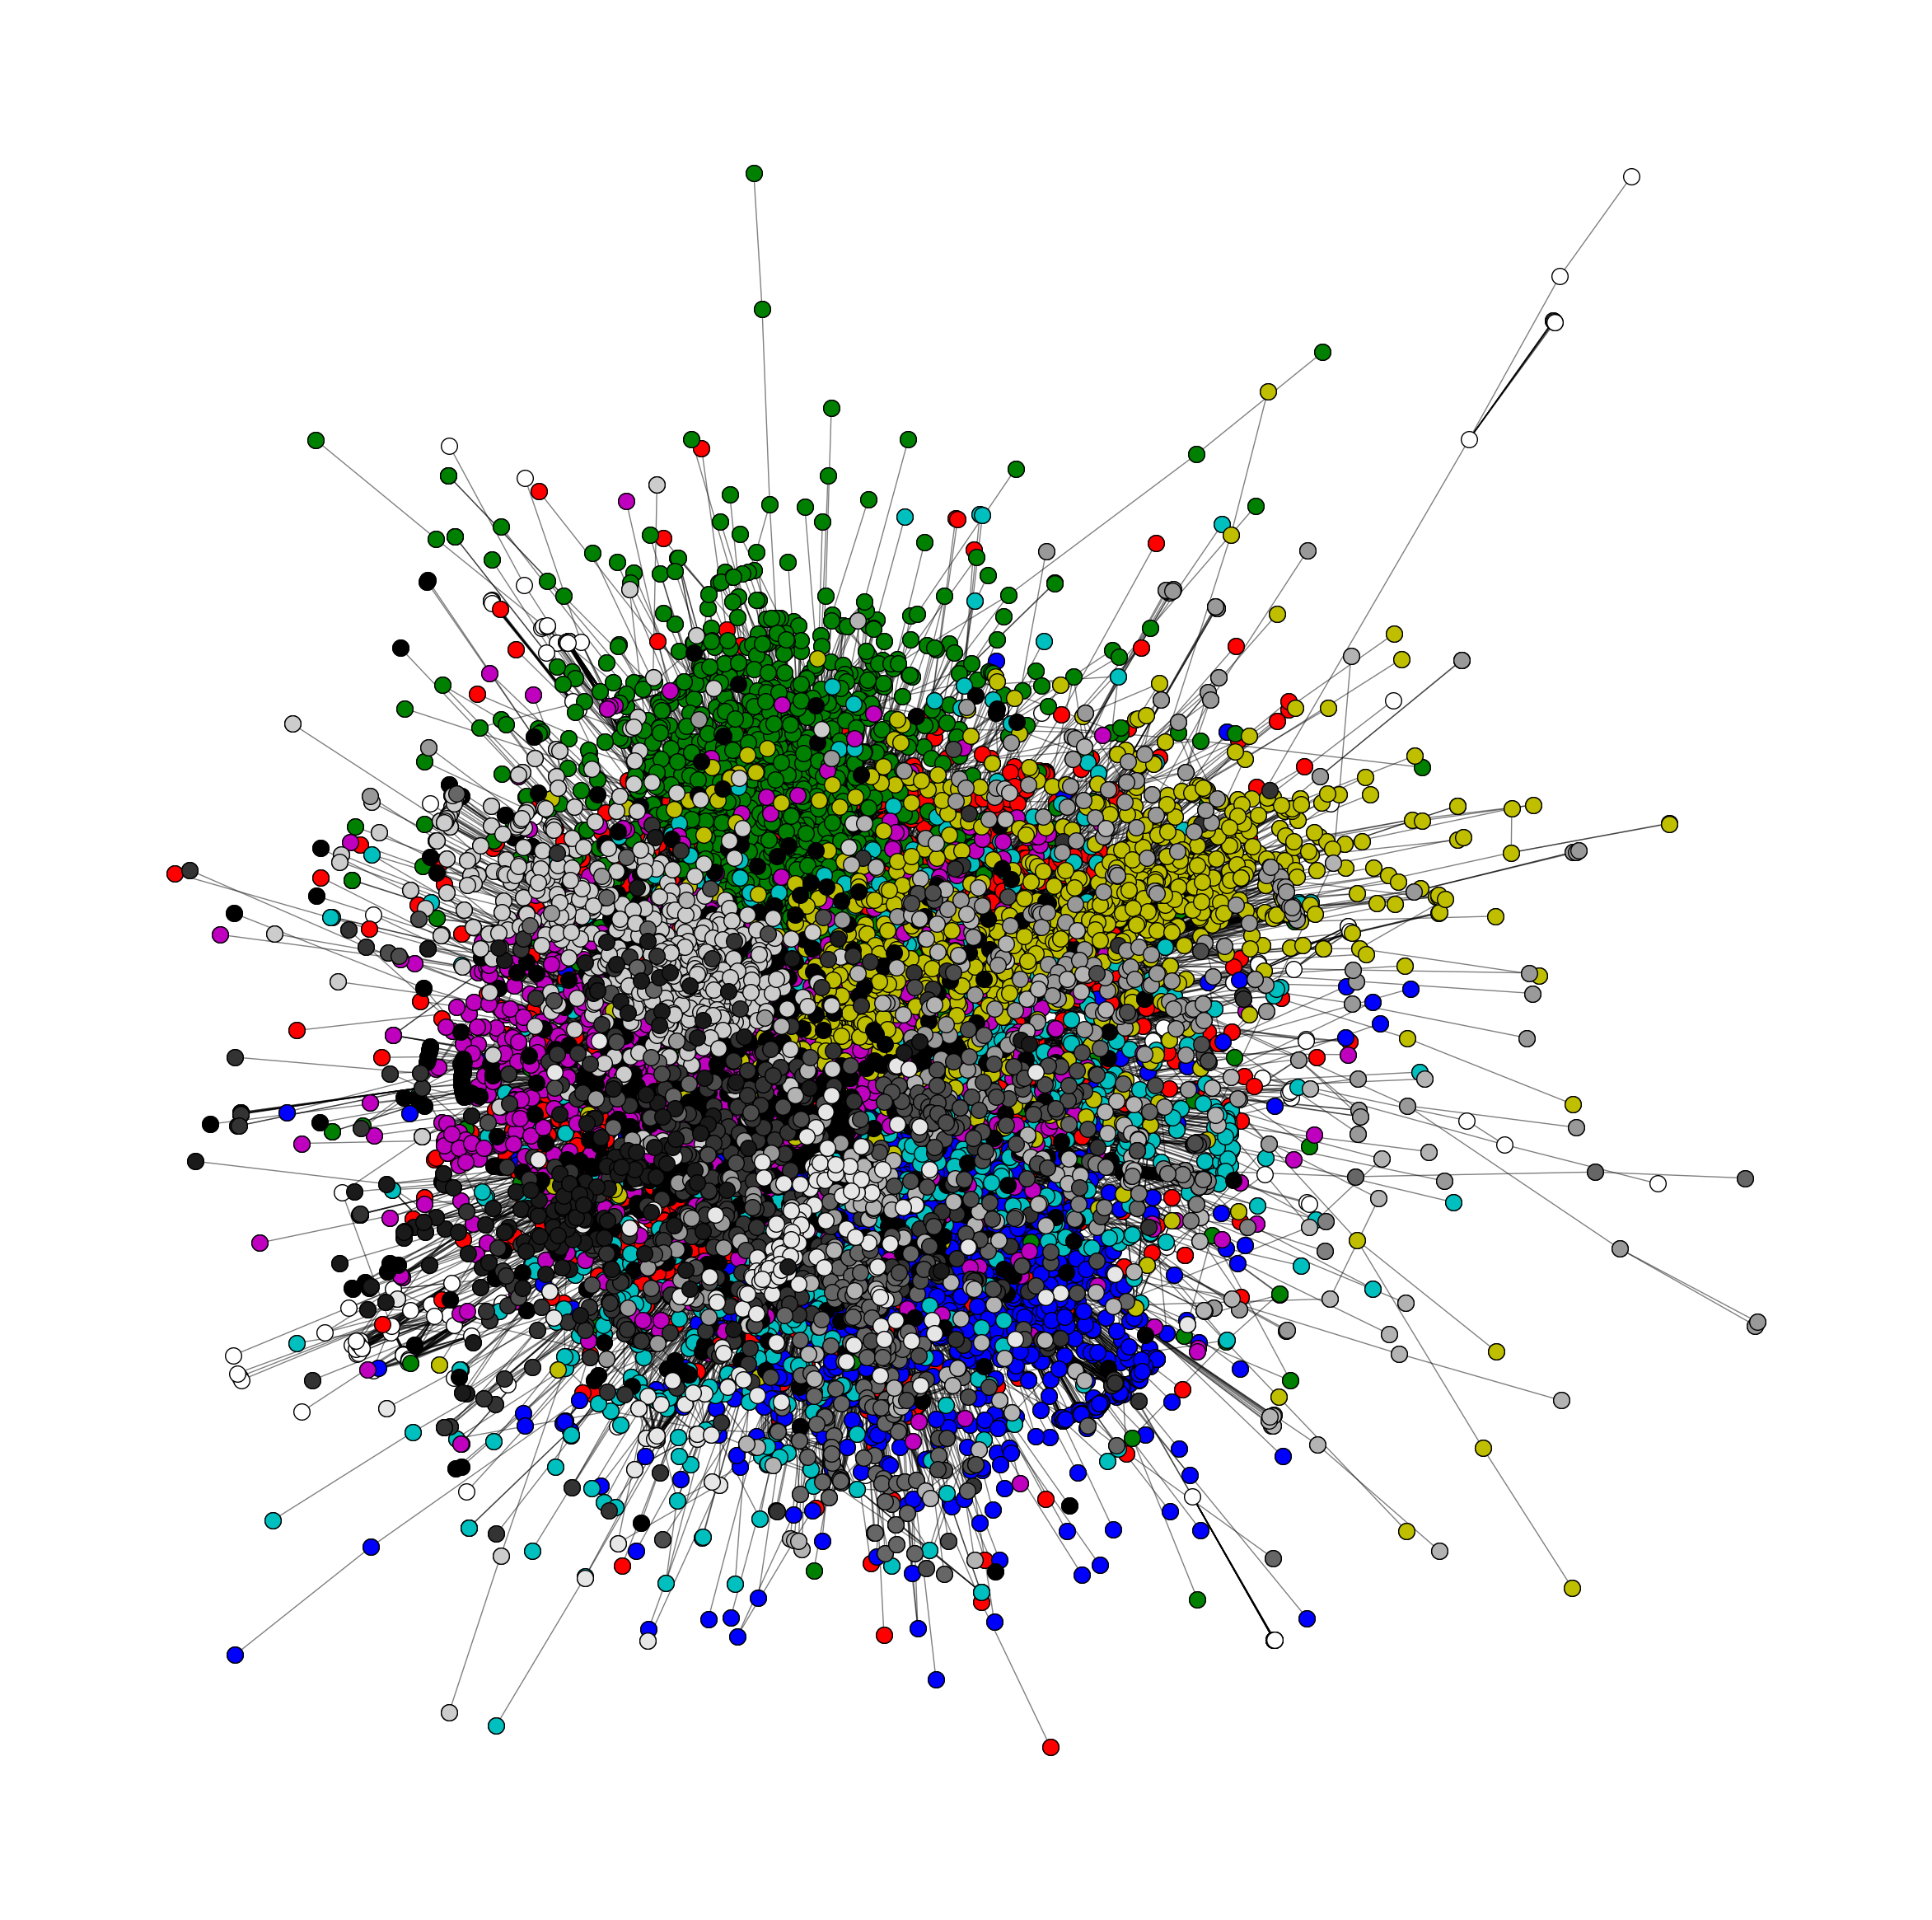

In [47]:
pos = nx.spring_layout(G)
viz.plot_network_clusters(G, louvain, pos, figsize=(30, 30), plot_labels=False)

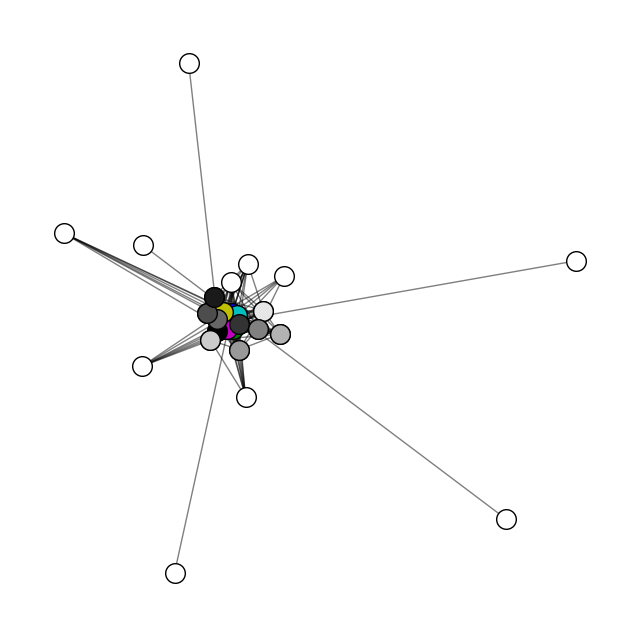

In [ ]:
viz.plot_community_graph(G,louvain)

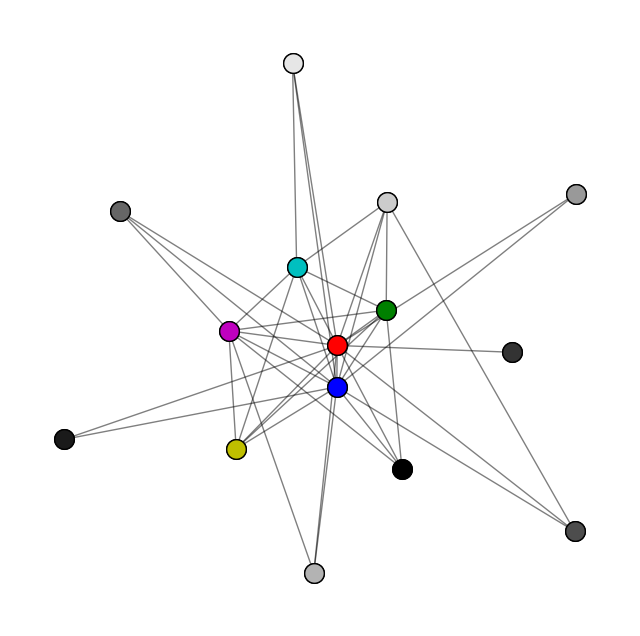

In [ ]:
viz.plot_community_graph(G,em)